## 第三章 算法分析

Data structure is a systematic way of organizing and accessing data, and an algorithm is a step-by-step procedure for performing some task in
a finite amount of time.

数据结构是组织和访问数据的一种系统化方式。算法是在有限时间内一步步执行某些任务的步骤。

实验中计算（算法）运行时间：

In [4]:
from time import time

start_time = time()
cumsum = 0
for i in range(10001):
    cumsum += i
end_time = time()

print(cumsum)
print(end_time - start_time)

50005000
0.003989458084106445


如果计算机上其他程序占用CPU，会影响算法运行时间，而`time()`给出的正是算法的运行时间，因此不是很好。

实验研究的一些缺点：

1. 由于硬件和软件条件的不同，实验很难直接比较两个算法的运行时间。
2. 实验毕竟只提供了一组样本，没有实现的输入结果未知。
3. 要做实验，需要先实现算法。

本章主要讲大O表示法。

O(g(n))是指给定一个常数c，当n趋于无穷时（存在$n_0$，n>$n_0$时），算法运行时间f(n)小于等于c * g(n)，可以称作：f(n)是O(g(n))。

多项式的最高次项决定了大O表示法中n的次数。

Python中求len(list)，由于list实例中记录了list长度，所以直接调用，运行时间为O(1)。

Python的list是基于数组序列执行的，list中的元素存储在连续的内存中，在调用第j个元素的时候，不需要通过迭代，而是直接根据第1个元素的内存地址来推算第j个元素的内存地址，调用第j个元素运行时间为O(1)。（这里相当于数组的访问元素的时间，是结合了Python的数据结构）

判断序列中是否存在相同元素：

1. 两层迭代，每个元素都判断是否与后面的元素相等，运行时间O($n^2$)。
2. 快速排序+一层迭代（判断是否有相邻元素相等），运行时间O($nlog^n$)。

目前来看，算法运行时间分为两种，一种是直接考虑各种 primitive operator 的数量，取增长速度最快的；一种是考虑各种数据结构的各种操作的运行时间。个人感觉这两种都应该优化，有时可以分开优化，有时又不得不全面考虑。

练习：

先画一下函数图像：

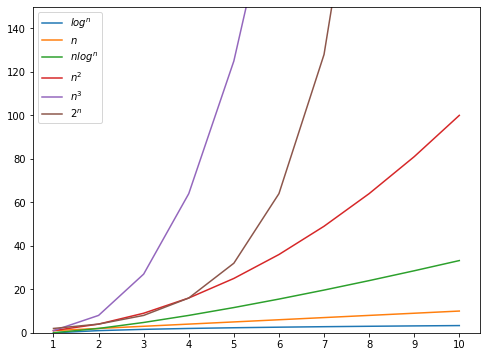

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 10, 10)
y_1 = np.log2(x)
y_2 = x
y_3 = y_1*y_2
y_4 = x**2
y_5 = x**3
y_6 = 2**x

plt.figure(figsize=(8, 6))

plt.plot(x, y_1, label='$log^n$')
plt.plot(x, y_2, label='$n$')
plt.plot(x, y_3, label='$nlog^n$')
plt.plot(x, y_4, label='$n^2$')
plt.plot(x, y_5, label='$n^3$')
plt.plot(x, y_6, label='$2^n$')

plt.ylim(0, 150)

plt.xticks(ticks=range(1, 11), labels=range(1, 11))

plt.legend(loc='upper left')

R-3.2

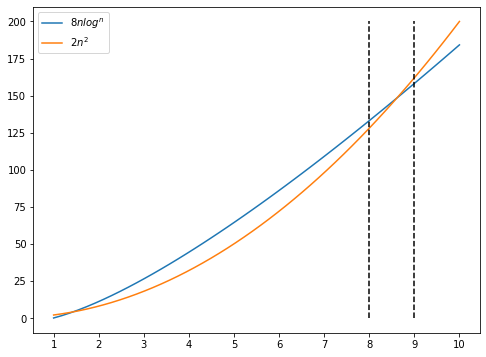

In [21]:
x = np.linspace(1, 10)
y_1 = 8*x*np.log(x)
y_2 = 2*(x**2)

plt.figure(figsize=(8, 6))

plt.plot(x, y_1, label='$8nlog^n$')
plt.plot(x, y_2, label='$2n^2$')
plt.plot((8, 8), (0, 200), color='black', linestyle = '--')
plt.plot((9, 9), (0, 200), color='black', linestyle = '--')

plt.xticks(ticks=range(1, 11), labels=range(1, 11))

plt.legend(loc='upper left')

 R-3.3

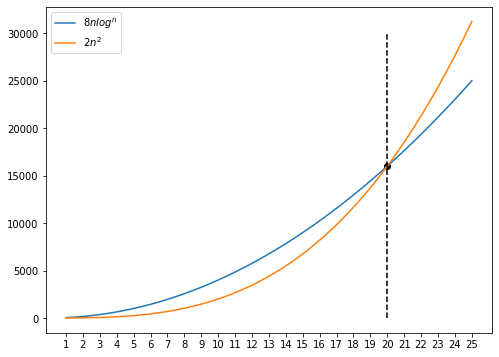

In [30]:
x = np.linspace(1, 25)
y_1 = 40*(x**2)
y_2 = 2*(x**3)

plt.figure(figsize=(8, 6))

plt.plot(x, y_1, label='$8nlog^n$')
plt.plot(x, y_2, label='$2n^2$')
plt.plot((20, 20), (0, 30000), color='black', linestyle = '--')
plt.scatter((20), (2*20**3), color='black')

plt.xticks(ticks=range(1, 26), labels=range(1, 26))

plt.legend(loc='upper left')

C-3.35

三集不相交问题，用排序算法来解决可以达到$O(nlog^n)$的运行时间。

C-3.41

以少于$\frac{3n}{2}$的比较次数，从n个数字中找出最小值和最大值。

先两两比较，大的放一个数组里，小的放一个数组里，$\frac{n}{2}$次；两个数组各自用打擂台法求最大值和最小值，$n-2$次，共$\frac{3n}{2}-2$次。

C-3.45

一个序列s，含[0, 99]范围内99个不重复的正整数，如何用时间复杂度为O(n)，除s外额外空间为O(1)的算法来找出没有在s中的整数？

解法：0-99求和减去s求和。